In [111]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras import Sequential
from keras.src.layers import Dense
from keras.src.utils import to_categorical
import pandas as pd
import numpy as np


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df = pd.read_csv(url, header=None, names=columns)
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [112]:


# Step 3: Encode Target Labels
# Now, the species column will contain values like 0, 1, and 2 instead of the string labels (setosa, versicolor, virginica).
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Step 4: Features and Labels
X = df.iloc[:, :-1].values  # Features: 4 numerical columns
y = df.iloc[:, -1].values   # Labels: Encoded species (0, 1, 2)

# One-Hot Encoding for Multi-class Classification
# One-Hot Encoding converts the integer labels (0, 1, 2) into one-hot encoded vectors (binary vectors) so that the model can use them for classification.
# For example, label 0 (Setosa) becomes [1, 0, 0], 1 (Versicolor) becomes [0, 1, 0], and 2 (Virginica) becomes [0, 0, 1].
# num_classes=3 because there are three species in the dataset.
y = to_categorical(y, num_classes=3)  # There are 3 unique species

# Step 5: Shuffle the Dataset
# We shuffle the data to make sure the model doesn’t learn from the data in a sequential order.
np.random.seed(42)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Step 6: Model Building
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),  # Hidden Layer with 8 neurons
    Dense(3, activation='softmax')  # Output Layer with 3 neurons for 3 classes
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Step 7: Model Training
history = model.fit(X, y, validation_split=0.2, epochs=25, batch_size=8, verbose=1)

C:\Users\kisme\anaconda3\envs\keras\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3284 - loss: 2.1923 - val_accuracy: 0.3667 - val_loss: 2.1553
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3266 - loss: 1.9445 - val_accuracy: 0.3667 - val_loss: 1.8958
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2703 - loss: 1.8719 - val_accuracy: 0.3667 - val_loss: 1.6912
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3513 - loss: 1.4742 - val_accuracy: 0.6000 - val_loss: 1.5047
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 1.2364 - val_accuracy: 0.6000 - val_loss: 1.3511
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6973 - loss: 1.1349 - val_accuracy: 0.6000 - val_loss: 1.2282
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6711 - loss: 1.0835 - val_accuracy: 0.6000 - val_loss: 1.1335
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6513 - loss: 1.0233 - val_accuracy: 0.6000 - val_loss

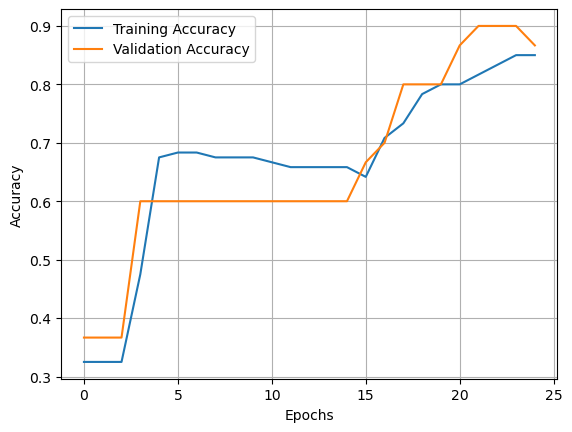

Final Training Accuracy: 0.86


In [113]:

# Step 8: Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Evaluate the Model
train_loss, train_acc = model.evaluate(X, y, verbose=0)
print(f"Final Training Accuracy: {train_acc:.2f}")

In [114]:

# make some prediction with the model, changeable sample
sample = np.array([[2.1, 2.5, 1.4, 0.2]]) # Sepal length, sepal width, petal length, petal width
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)
species_name = label_encoder.inverse_transform([predicted_class])

print(f"Sample: {sample[0]}")
print(f"Predicted Species: {species_name[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Sample: [2.1 2.5 1.4 0.2]
Predicted Species: Iris-setosa
